In [2]:
# Imports
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# func params
a_s = np.array([288.5, 3477, 1700, 1.036, 3058, 2533, 2923, 357.1])
b_s = np.array([0.00645, 0.006347, 0.004174, 0.001731, -0.001027, 0.008404, 0.002118, 0.007327])
c_s = np.array([0.000343, 0.001874, 0.001678, 1.079e-5, 0.002381, 0.0009477, 0.002298, 0.0004674])

# func create
def signal(fs, spec_purity = None):
    """
    Input:
        fs: sampling frequency
        spec_purity (optional): spectral purity to discard values 
            lower than 20*log(v_max) - spec_purity
    Output:
        wave_array: numpy array consisting of signal values for timelist
    """
    dt = 1/fs # Time interval
    tlist = np.arange(dt, 0.00822, dt)

    def f_t(t):
        f = sum(a_s[i] * np.exp(-((t - b_s[i])/c_s[i])**2) for i in range(len(a_s)))
        return f
    
    signal = f_t(tlist)
    print(20 * np.log(np.max(signal)))

    if spec_purity != None:
        max_val_db = 20 * np.log(np.max(signal))
        for i, val in enumerate(signal):
            if 20 * np.log(val) < max_val_db - spec_purity:
                print(20 * np.log(val))
                signal[i] = 0
    
    return signal

In [30]:
s_0 = signal(1.4e9)
s_1 = signal(1e3, 80)

166.7847307345961
166.3979228720546


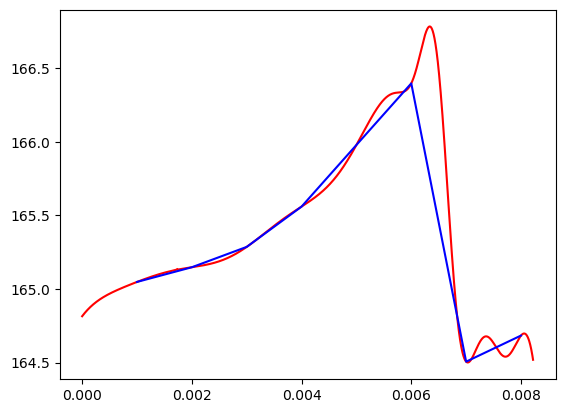

In [34]:
fig, ax = plt.subplots()
ax.plot(np.arange(1/1.4e9, 0.00822, 1/1.4e9), 20 * np.log(s_0), "r")
ax.plot(np.arange(1/1e3, 0.00822, 1/1e3), 20 * np.log(s_1), "b")